In [1]:
from PIL import Image 
from numpy import complex, array 
import colorsys 

In [4]:
# setting the width of the output image as 1024 
WIDTH = 1024
  
# a function to return a tuple of colors 
# as integer value of rgb 
def rgb_conv(i): 
    color = 255 * array(colorsys.hsv_to_rgb(i / 255.0, 1.0, 0.5)) 
    return tuple(color.astype(int)) 
  
# function defining a mandelbrot 
def mandelbrot(x, y): 
    c0 = complex(x, y) 
    c = 0
    for i in range(1, 1000): 
        if abs(c) > 2: 
            return rgb_conv(i) 
        c = c * c + c0 
    return (0, 0, 0) 
  
# creating the new image in RGB mode 
img = Image.new('RGB', (WIDTH, int(WIDTH / 2))) 
pixels = img.load() 
  
for x in range(img.size[0]): 
  
    # displaying the progress as percentage 
    print("%.2f %%" % (x / WIDTH * 100.0))  
    for y in range(img.size[1]): 
        pixels[x, y] = mandelbrot((x - (0.75 * WIDTH)) / (WIDTH / 4), 
                                      (y - (WIDTH / 4)) / (WIDTH / 4)) 
  
# to display the created fractal after  
# completing the given number of iterations 
img.show() 

0.00 %
0.10 %
0.20 %
0.29 %
0.39 %
0.49 %
0.59 %
0.68 %
0.78 %
0.88 %
0.98 %
1.07 %
1.17 %
1.27 %
1.37 %
1.46 %
1.56 %
1.66 %
1.76 %
1.86 %
1.95 %
2.05 %
2.15 %
2.25 %
2.34 %
2.44 %
2.54 %
2.64 %
2.73 %
2.83 %
2.93 %
3.03 %
3.12 %
3.22 %
3.32 %
3.42 %
3.52 %
3.61 %
3.71 %
3.81 %
3.91 %
4.00 %
4.10 %
4.20 %
4.30 %
4.39 %
4.49 %
4.59 %
4.69 %
4.79 %
4.88 %
4.98 %
5.08 %
5.18 %
5.27 %
5.37 %
5.47 %
5.57 %
5.66 %
5.76 %
5.86 %
5.96 %
6.05 %
6.15 %
6.25 %
6.35 %
6.45 %
6.54 %
6.64 %
6.74 %
6.84 %
6.93 %
7.03 %
7.13 %
7.23 %
7.32 %
7.42 %
7.52 %
7.62 %
7.71 %
7.81 %
7.91 %
8.01 %
8.11 %
8.20 %
8.30 %
8.40 %
8.50 %
8.59 %
8.69 %
8.79 %
8.89 %
8.98 %
9.08 %
9.18 %
9.28 %
9.38 %
9.47 %
9.57 %
9.67 %
9.77 %
9.86 %
9.96 %
10.06 %
10.16 %
10.25 %
10.35 %
10.45 %
10.55 %
10.64 %
10.74 %
10.84 %
10.94 %
11.04 %
11.13 %
11.23 %
11.33 %
11.43 %
11.52 %
11.62 %
11.72 %
11.82 %
11.91 %
12.01 %
12.11 %
12.21 %
12.30 %
12.40 %
12.50 %
12.60 %
12.70 %
12.79 %
12.89 %
12.99 %
13.09 %
13.18 %
13.28 %
13.38 %

In [5]:
# Mandelbrot fractal 
# FB - 201003254 
from PIL import Image 
  
# drawing area 
xa = -2.0
xb = 1.0
ya = -1.5
yb = 1.5
  
# max iterations allowed 
maxIt = 255 
  
# image size 
imgx = 512
imgy = 512
image = Image.new("RGB", (imgx, imgy)) 
  
for y in range(imgy): 
    zy = y * (yb - ya) / (imgy - 1)  + ya 
    for x in range(imgx): 
        zx = x * (xb - xa) / (imgx - 1)  + xa 
        z = zx + zy * 1j
        c = z 
        for i in range(maxIt): 
            if abs(z) > 2.0: break
            z = z * z + c 
        image.putpixel((x, y), (i % 4 * 64, i % 8 * 32, i % 16 * 16)) 
  
image.show() 

In [1]:
import numpy
from numba import autojit
import matplotlib.pyplot as plt

In [2]:
@autojit
def mandelbrot(Re, Im, max_iter):
    c = complex(Re, Im)
    z = 0.0j
    
    for i in range(max_iter):
        z = z*z + c
        if(z.real*z.real + z.imag*z.imag) >= 4:
            return i
        
    return max_iter

c:\users\wiebe\appdata\local\programs\python\python37-32\lib\site-packages\numba\decorators.py:33: NumbaDeprecationWarning: autojit is deprecated, use jit instead, which provides the same functionality. For more information visit http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-numba-autojit
  warnings.warn(NumbaDeprecationWarning(msg))


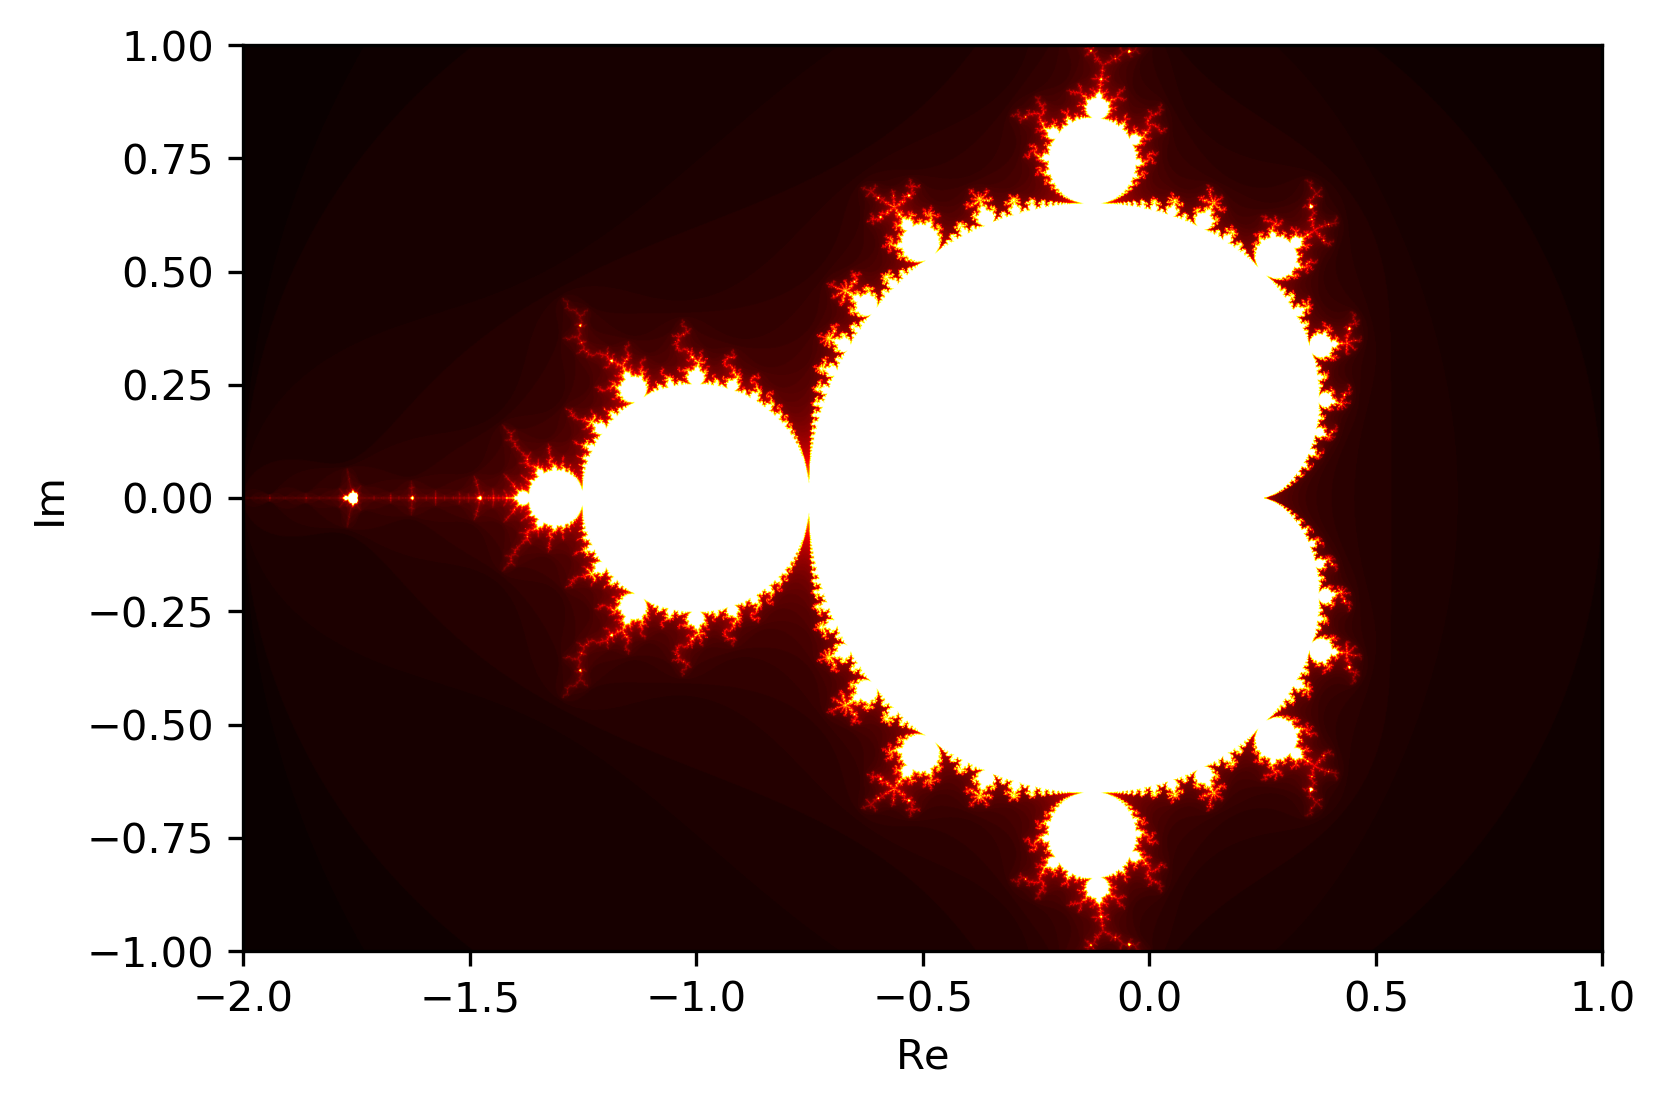

In [3]:
columns = 2000
rows = 2000

result = numpy.zeros([rows, columns])
for row_index, Re in enumerate(numpy.linspace(-2, 1, num=rows)):
    for column_index, Im in enumerate(numpy.linspace(-1,1, num=columns)):
        result[row_index, column_index] = mandelbrot(Re, Im, 100)
        
plt.figure(dpi=300)
plt.imshow(result.T, cmap = 'hot', interpolation = 'bilinear', extent = [-2,1,-1,1])
plt.xlabel("Re")
plt.ylabel("Im")
plt.show()